#  Fundamentals of Financial Time Series - Prices and Returns

<br>

## Definition of Price and Return Types

<br>

Given a financial security, denote its **(discrete) price process** with $\{P_t\}_{t \in T }$
where $T \subseteq \mathbb{Z}$. Let t denote the corresponding time period.

<br>

The **net return** of a security over one period, i.e. from t-1 to t, is defined by

\begin{align}
R_t = \dfrac{P_t - P_{t-1}}{P_{t-1}} = \dfrac{P_t}{P_{t-1}}-1
\end{align}

$\{R_t\}_{t \in T }$ is called the **(net) return process** of the security and measures
the percentage change over one time period. Computing returns is related to differencing and normalization which enables a comparison across different assets. Note that this quantity is independent of any unit.

<br>

The **logarithmic return** or **continuously compounded return** is defined by

\begin{align}
R^{log}_t = log \left( \dfrac{P_t}{P_{t-1}} \right)=log(P_t)-log(P_{t-1})
\end{align}

<br>

Finally, for completeness the **gross return** is defined as

\begin{align}
\dfrac{P_t}{P_{t-1}} = 1 + R_t
\end{align}

<br>

Usually, return data are used for time series modeling rather than prices. One reason is the property of
stationarity through differencing which is an important requirement in order to model returns with a certain class of time series, e.g. ARMA processes.

<br>

In practical work, $\{P_t\}_{t \in T }$ is usually a finite data set and T represents the length of the time series. In
the following we will visualize these time series via Python.

<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm, t
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

def load_data_yahoo_finance(CSV_File_Name):
    df = pd.read_csv(CSV_File_Name)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index(df['Date'], inplace=True)
    df = df.dropna()
    return df

In [3]:
# Load the csv data file containing amazon stocks
df = load_data_yahoo_finance('GDAX.csv')

# Display the first 5 entries
df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,6961.720215,7159.330078,6720.870117,6750.759766,6750.759766,43072500.0
2000-01-04,2000-01-04,6747.240234,6755.359863,6510.459961,6586.950195,6586.950195,46678400.0
2000-01-05,2000-01-05,6585.850098,6585.850098,6388.910156,6502.069824,6502.069824,52682800.0
2000-01-06,2000-01-06,6501.450195,6539.310059,6402.629883,6474.919922,6474.919922,41180600.0
2000-01-07,2000-01-07,6489.939941,6791.529785,6470.140137,6780.959961,6780.959961,56058900.0


We use the adjusted closing price for modelling. Choosing adjusted closing price is
reasonable because dividend payments are taken into account. Thus, no jumps will occur
in the time series.

In [4]:
df_price = df['Adj Close']

# Compute returns
df_returns = df_price.pct_change().dropna()*100

# Compute log prices then log returns
df_logprice = np.log(df_price)
df_logreturns = df_logprice.diff(1).dropna()*100

Let us first investigate and visualize the price time series of the stock. 

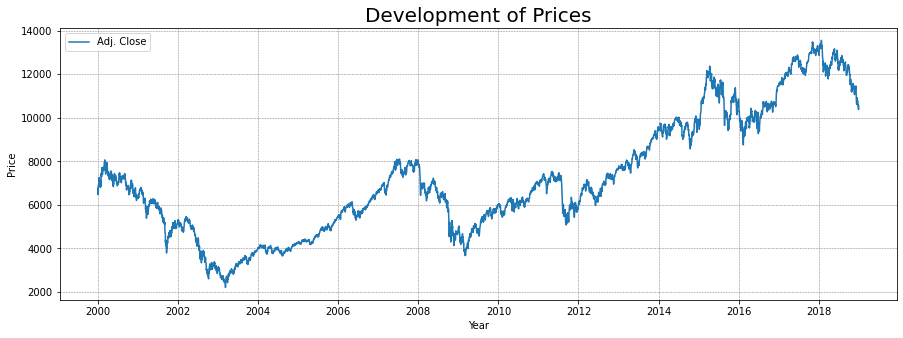

In [5]:
fig1, ax1 = plt.subplots(1)
fig1.set_size_inches(15, 5)
ax1.set_title('Development of Prices', fontsize = 20)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.grid(color='grey', linestyle='--', linewidth=0.5)
ax1.plot(df_price)
ax1.legend(['Adj. Close'], loc=2)
plt.show()

As you can see above the price changes rapidly over time. Asymptotically, it is impossible to say in which "direction"
the prices are heading. This lack of stability is in particular difficult to model using standard time series techniques.

Take a look at the return series.

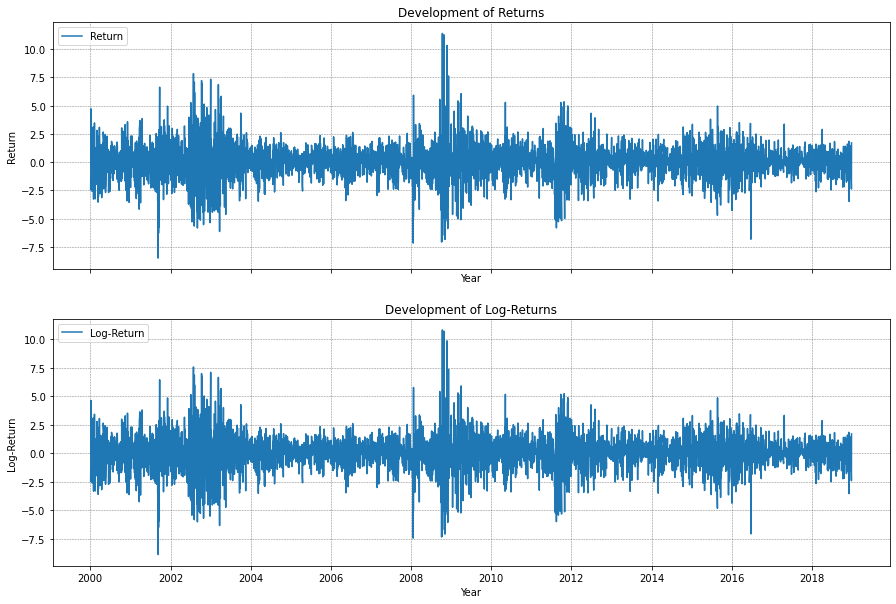

In [6]:
fig, (ax2, ax3) = plt.subplots(2, sharex=True)
fig.set_size_inches(15,10)
ax2.set_title('Development of Returns', fontsize = 12)
ax2.set_xlabel('Year')
ax2.set_ylabel('Return')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)
ax2.plot(df_returns)
ax2.legend(['Return'], loc=2)
ax3.set_title('Development of Log-Returns', fontsize = 12)
ax3.set_xlabel('Year')
ax3.set_ylabel('Log-Return')
ax3.grid(color='grey', linestyle='--', linewidth=0.5)
ax3.plot(df_logreturns)
ax3.legend(['Log-Return'], loc=2)
plt.show()


We can see that the return time series evolves around around zero. This is important once
we try to fit time series models to the data.

<br>

Furthermore, the difference between returns and log-returns are minor.
This is the case because for small returns it holds roughtly:

$$log(1+r) \approx r \quad \text{for} \quad |r| < 0.1$$

However, the similarity only holds for returns over short periods, e.g. daily.
Both quantities will differ once longer periods are compared *(Ruppert, 2015, p.6)*.

### Why do we use logarithmic returns?

<br>

Using log-returns coincides with the assumption that **prices** follow a log-normal distribution.
This also ensures that prices remain positive. If prices are log-normally distributed then logarithm of
prices are normal and thus the returns are normally distributed. Normality of returns is often assumed
in many models. However, we know that returns are not normally distributed...

<br>

Another reason to use log-returns is the reduction of algorithmic complexity.
Especially when returns over multiple time periods are evaluated.

- $\prod\limits_{i=1}^{t \in T}(1+r_i)$ is difficult to compute and is usually not normally distributed


- $\sum\limits_{i=1}^{t \in T}log(1+r_i) = log(p_t) - log(p_0)$ which remains normally distributed
    *(assuming independence)*


As was shown above, log-returns are additive over time. However, they are
not additive over assets. *(Show it with an example)*



In general, applying a log-transformation for an economic variable may lead to better results in terms of forecasting,
i.e. in smaller MSE *(Lütkepohl and Xu, 2010, p.620-621)*


In contrast to other statistical disciplines, time series econometrics is based on only one dataset. In other branches,
inference is based on samples generated by e.g. (independent) experiments. Each data point is the outcome of
one conducted experiment. Doing the same experiment thousands times yields a dataset on which inference may
be performed. In time series analysis, one data point can be considered as an outcome of one experiment only if time
independence is assumed. Therefore, stationarity and in particular independence of the data points are essential in
order to perform reasonable predictions.

## Stylized Facts of Financial Time Series

Financial time series exhibits some unique behavior. They are sometimes also referred to
as stylized facts [McNeil,Frey,Embrechts (2005), p.117]

(F1) Return series are not iid although they show little serial correlation. <br/>
(F2) Series of absolute or squared returns show profound serial correlation. <br/>
(F3) Conditional expected returns are close to zero. <br/>
(F4) Volatility appears to vary over time. <br/>
(F5) Return series are leptokurtic or heavy-tailed. <br/>
(F6) Extreme returns appear in clusters. <br/>

We will examine some of those features above in the next step. The best way to visualize serial correlation is to
plot the autocorrelation and partial autocorrelation functions.

For (F1), we get:

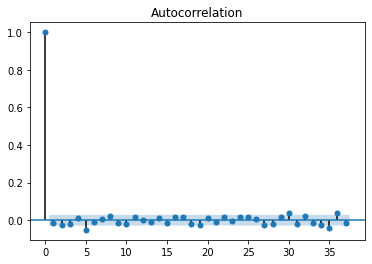

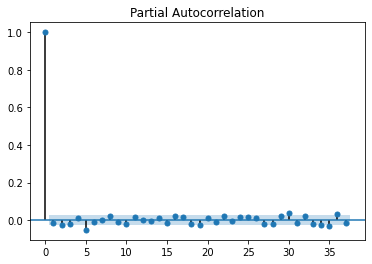

In [7]:
ACF = plot_acf(df_returns, alpha=0.05)
PACF = plot_pacf(df_returns, alpha=0.05)

As the previous two plots suggest, there seem little autocorrelation among returns.

Next, (F2) requires squared and absolute returns. We will only show this fact with
squared returns, tryout absolute returns as a small homework.

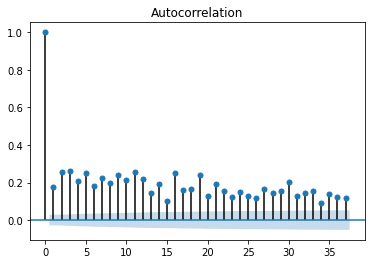

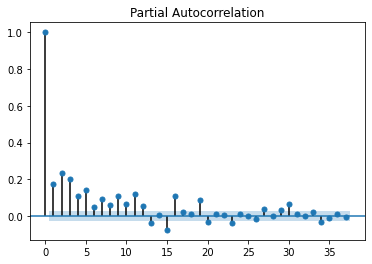

In [8]:
df_returns_squared = np.square(df_returns)

ACF = plot_acf(df_returns_squared)
PACF = plot_pacf(df_returns_squared)

The best way to visualize volatility cluster is to simply look at the return time series.
We can clearly see that extrem events appear in clusters (F6) and that volatility changes in time (F4).

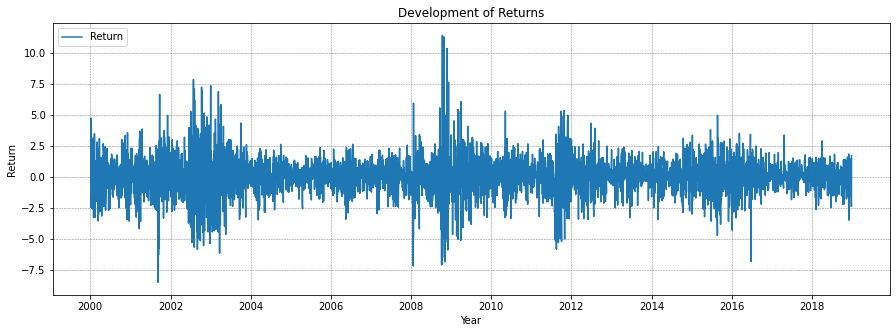

In [9]:
fig, ax2 = plt.subplots(1,)
fig.set_size_inches(15,5)
ax2.set_title('Development of Returns', fontsize = 12)
ax2.set_xlabel('Year')
ax2.set_ylabel('Return')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)
ax2.plot(df_returns)
ax2.legend(['Return'], loc=2)
plt.show()

Finally and one of the most important properties of return distributions is the fact that they are leptocurtic or/and
display heavy tails (F5). Consider the so descriptive statistics first.

In [10]:
df_returns.describe()

count    4821.000000
mean        0.020222
std         1.479811
min        -8.492271
25%        -0.693573
50%         0.070068
75%         0.749194
max        11.401954
Name: Adj Close, dtype: float64

Let's visualize this by fitting a normal and a t distribution.

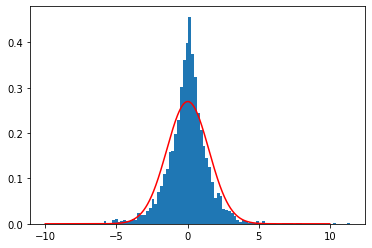

In [11]:
# Fit a normal distribution (Maximum-Likelihood)
mu_norm, sigma_norm = norm.fit(df_returns)

# Create probability density of fitted distribution
interval = np.linspace(-10, 10, num=len(df_returns))
fitted_data_norm = norm.pdf(interval, loc=mu_norm, scale=sigma_norm)

# Plot histogram, density=True normalizes the histogram bins to a prob histogram on which a density may be plotted
hist = plt.hist(df_returns, density=True, bins=100)

# Plot density on top of histogram
plt.plot(interval, fitted_data_norm, 'r-')


Obviously, the normal distribution is not able to capture the peak in at the center

Repeat the same procedure with the t-distribution.

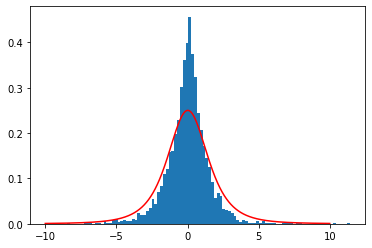

In [12]:
degf, mu_t, sigma_t = t.fit(df_returns)

interval = np.linspace(-10, 10, num=len(df_returns))
fitted_data_t = t.pdf(interval,df=degf, loc=mu_norm, scale=sigma_norm)

# density=True normalizes the histogram to a density
hist = plt.hist(df_returns, density=True, bins=100)

plt.plot(interval, fitted_data_t, 'r-')
plt.show()

Both normal and t-distribution are not able to capture the leptocurtic behaviour of return data.
However, given that the t-distribution has more probability mass in the tails, we are able to capture
extreme events accordingly.



### References

[McNeil,Frey,Embrechts (2005), p.117]